In [1]:
import pandas as pd 
import numpy as np
import os
from skimage.feature import hog
from skimage import data, exposure
import matplotlib.pyplot as plt
from KNN import knn_predict_instance




In [2]:
#cwd = os.getcwd() #if need the current directory 
df = pd.read_csv('digit-recognition/digit-recognition/train.csv')
df2 = pd.read_csv('digit-recognition/digit-recognition/test.csv')
#the shape of the dataframe is (38000, 785) meaning there are 38000 samples and 1 label with 784 features

In [68]:
#df.iloc[0,:] to access a certain column or row by index
#any other fun commands to put 

#try to interpret the data graphically 

In [3]:
#turn the training dataframe into numpy array 
label_data_train = df.to_numpy()

#column vector for the labels (38000,)
label_train = label_data_train[:,0] 

#( 38000 x 784 matrix for the training data  )
data_train = label_data_train[:, 1:] 
print(label_train.shape)
print(data_train.shape)

#turn testing dataframe into numpy array 
label_data_test = df2.to_numpy()
label_test = label_data_test[:,0]
data_test = label_data_test[:,1:]


(38000,)
(38000, 784)


In [70]:
#Use sklearn library to try a KNN 
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(data_train, label_train)
knn_predictions = neigh.predict(data_test)

KeyboardInterrupt: 

In [4]:
#performs feature extraction 
#code taken from https://medium.com/@basu369victor/handwritten-digits-recognition-d3d383431845
#images aren't all same length so don't need to worry about scaling
import matplotlib.pyplot as plt
from skimage.feature import hog
list_hog = []
list_hog1 = []
for feature in data_train:
    fd = hog(feature.reshape((28,28)), orientations=9, pixels_per_cell=(4,4),cells_per_block=(1,1),visualize=False ) #can probably optimize this
    list_hog.append(fd) #4x4 seems to be optimal 
hog_features_train = np.array(list_hog, 'float64')

#on testing data 
for feature in data_test:
    fd = hog(feature.reshape((28,28)), orientations=9, pixels_per_cell=(4,4),cells_per_block=(1,1),visualize=False )
    list_hog1.append(fd)
hog_features_test = np.array(list_hog1, 'float64')


(4000, 441)
(4000, 784)


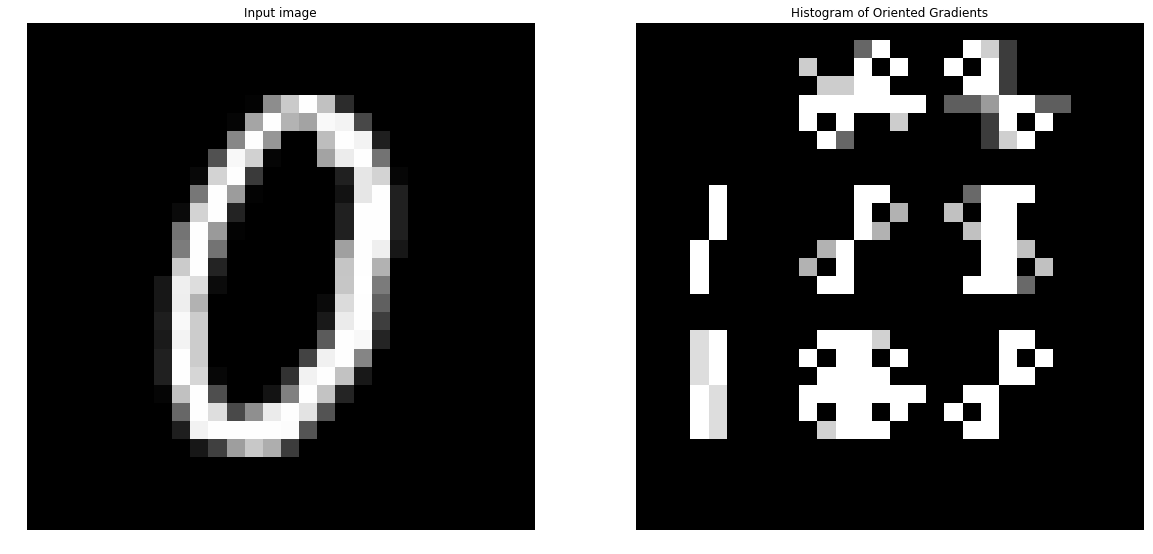

In [43]:
#hog visualization 
#code taken from https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html
import matplotlib.pyplot as plt
print(hog_features_test.shape)
print(data_test.shape)
image = data_test[5,:].reshape((28,28)) #can do this for multiple images 

fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(1, 1), visualize=True, multichannel=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [15]:
#Use sklearn library to try SVM model 
#linear appears to work the best with HOG 
from sklearn import svm
from sklearn.multiclass import OneVsOneClassifier
clf = OneVsOneClassifier(svm.LinearSVC()) #performs slightyly better on SVM both linear and RBF
#clf = svm.LinearSVC()
clf.fit(hog_features_train, label_train)
svm_predictions = clf.predict(hog_features_test)
print(svm_predictions.shape)

(4000,)


In [ ]:
from sklearn import svm
clf = OneVsOneClassifier(svm.SVC())
clf.fit(data_train, label_train)
svm_predictions = clf.predict(data_test)
print(svm_predictions.shape)

In [17]:
#compute accuracy using sklearn 
from sklearn import metrics
print(label_train.shape)
print(label_test.shape)
#print("KNN Accuracy:",metrics.accuracy_score(label_test, knn_predictions))
print("SVM Accuracy:",metrics.accuracy_score(label_test, svm_predictions))

(38000,)
(4000,)
SVM Accuracy: 0.9715


In [56]:
#unewighted KNN with euclidean distance for an instance 
#calculate using euclidean distance 
#would be data_test.shape[0]
knn_predicts = []
for i in range(data_test.shape[0]):
    knn_predicts.append(knn_predict_instance(data_train, label_train, data_test[i,:], 3))


In [62]:
correct = 0
print(len(knn_predicts))
for i in range(data_test.shape[0]):
    if label_test[i]==knn_predicts[i]:
        correct = correct+1
print(correct/4000)


4000
0.973
